In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import trange, tqdm

import geopandas as gpd
from shapely.geometry import Point, Polygon
from osgeo import gdal, osr, ogr


## 预处理

In [17]:
import json

json_file = 'C:/Users/13532/pycode/huawei/data/矢量/china.json'

# 创建一个空的 JSON 数据结构（空字典）
data = {}

# 写入空的 JSON 文件
with open(json_file, 'w', encoding='utf-8') as file:
    json.dump(data, file, ensure_ascii=False, indent=4)

print(f'空的 JSON 文件已创建: {json_file}')



空的 JSON 文件已创建: C:/Users/13532/pycode/huawei/data/矢量/china.json


In [19]:
# gdf = gpd.read_file('../../z_GIS_Data/矢量/国界/国家矢量.shp')
#url = 'https://geojson.cn/api/data/china.json'
#url='https://geo.datav.aliyun.com/areas_v3/bound/100000.json'
path = 'C:/Users/13532/pycode/huawei/data/矢量/china.json'
#url = 'https://geo.datav.aliyun.com/areas_v3/bound/100000.json'
#https://geo.datav.aliyun.com/areas_v3/bound/100000.json
gdf = gpd.read_file(path)
# gdf = gpd.read_file('../../z_GIS_Data/矢量/2023年省级/2023年省级.shp')  # 可以读取 url

<Axes: >

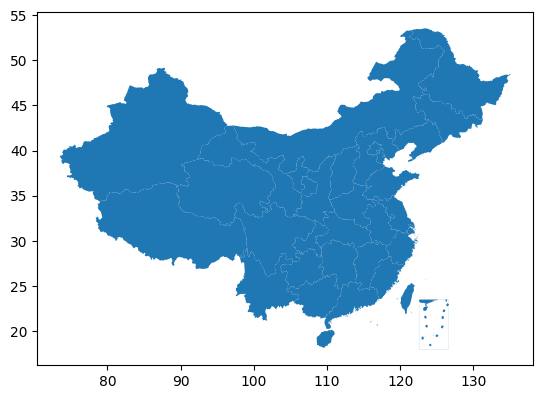

In [20]:
gdf.plot()

In [21]:
def make_grid(boundary, radius):
    # 以边界的中心点按照radius半径进行外扩
    minx, miny, maxx, maxy = boundary.total_bounds
    deltax = ((maxx-minx)%(radius*2)) / 2
    deltay = ((maxy-miny)%(radius*2)) / 2
    minx -= deltax
    maxx += deltax
    miny -= deltay
    maxy += deltay
    cells = []
    for x in np.arange(minx, maxx, radius*2):
        for y in np.arange(miny, maxy, radius*2):
            cells.append(Polygon([(x,y),(x,y+radius*2),(x+radius*2,y+radius*2),(x+radius*2,y),(x,y)]))
    return gpd.GeoDataFrame(cells,columns=['geometry'],crs=boundary.crs).sjoin(boundary,how='inner')  

In [22]:
grid = make_grid(gdf, 0.25)

C:\Users\13532\AppData\Local\Temp\ipykernel_45588\1321200232.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_path)


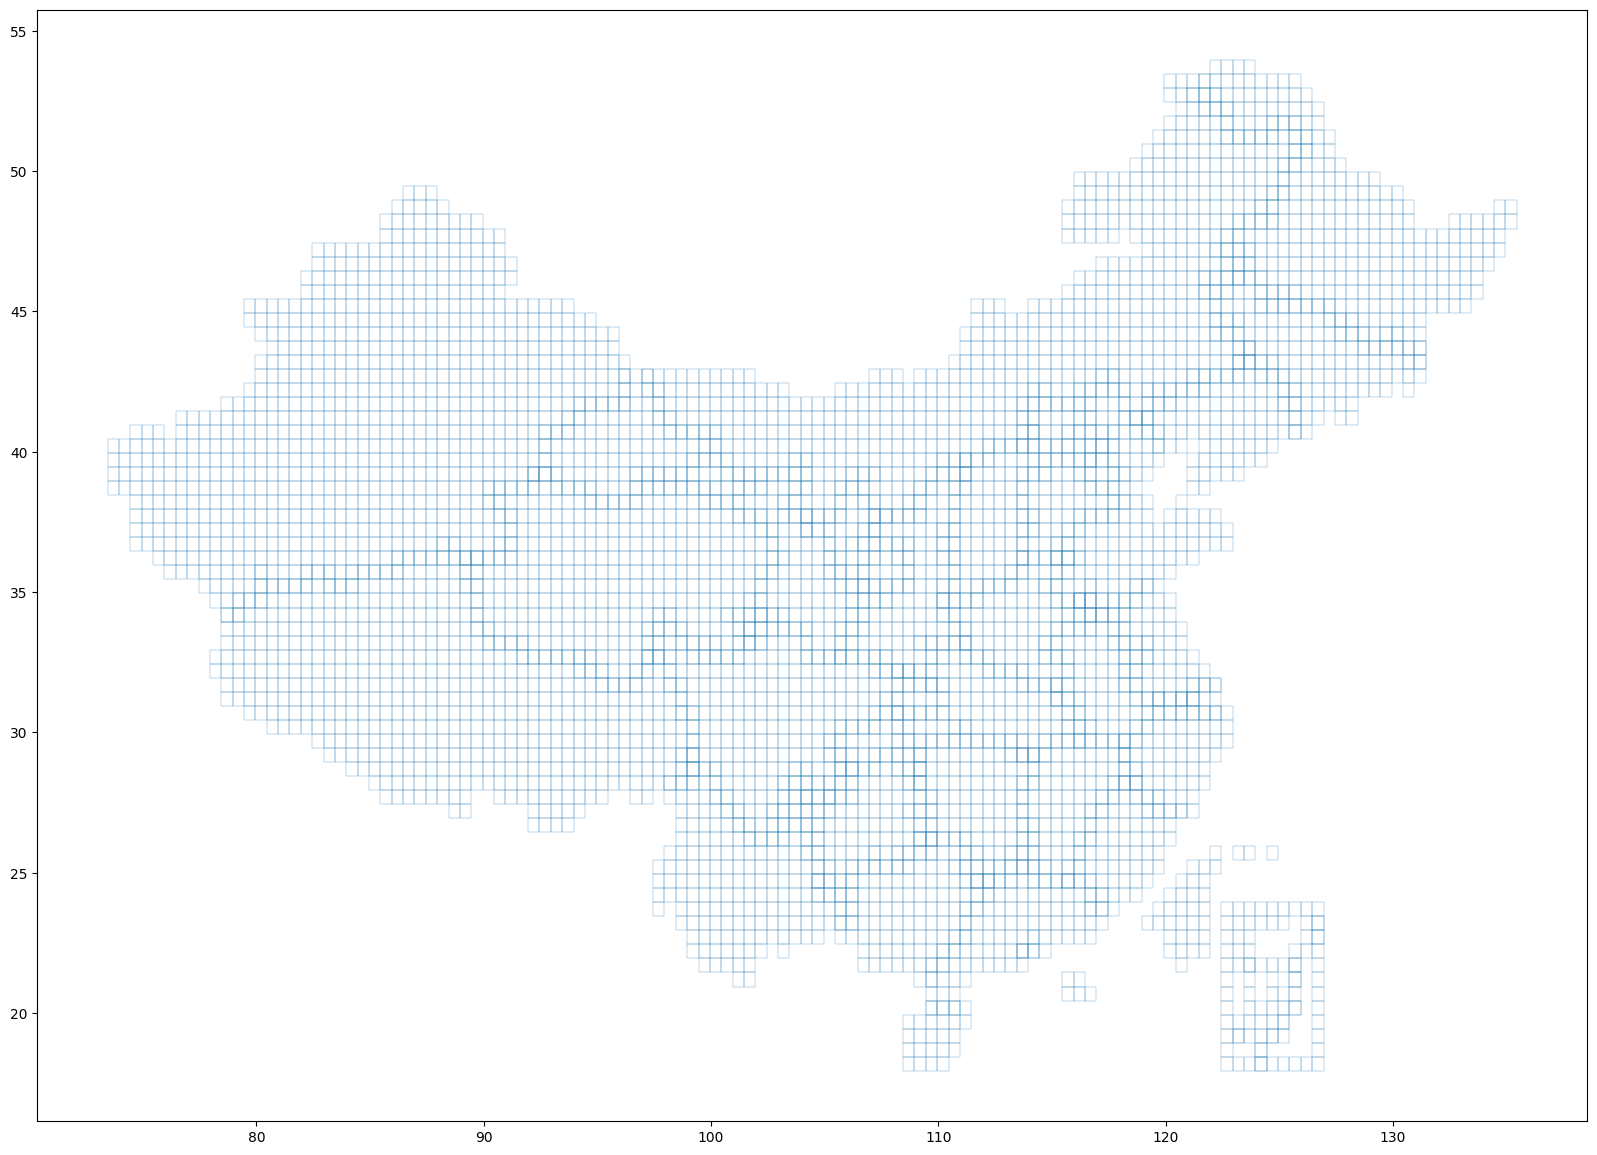

In [23]:
grid.boundary.plot(lw=0.2, figsize=(20,20))
# 保存为 Shapefile
output_path = 'data/矢量/grid.shp'
gdf['geometry'] = gdf.geometry.buffer(0)
gdf.to_file(output_path)

In [24]:
grid.reset_index(inplace=True)
grid = grid[['geometry','name']].copy()
grid['FID'] = grid.index
# 打印前几行来检查 'FID' 列
print(grid.head())

# 使用 .info() 方法查看所有列的详细信息
grid.info()

                                            geometry name  FID
0  POLYGON ((73.45570 38.44871, 73.45570 38.94871...   新疆    0
1  POLYGON ((73.45570 38.94871, 73.45570 39.44871...   新疆    1
2  POLYGON ((73.45570 39.44871, 73.45570 39.94871...   新疆    2
3  POLYGON ((73.45570 39.94871, 73.45570 40.44871...   新疆    3
4  POLYGON ((73.95570 38.44871, 73.95570 38.94871...   新疆    4
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5210 entries, 0 to 5209
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  5210 non-null   geometry
 1   name      5210 non-null   object  
 2   FID       5210 non-null   int64   
dtypes: geometry(1), int64(1), object(1)
memory usage: 122.2+ KB


In [25]:
grid = gpd.read_file('data/矢量/grid.shp')
print(grid.columns)  # 打印所有列名

Index(['name', 'childrenNu', 'level', 'code', 'filename', 'fullname', 'bbox',
       'geometry'],
      dtype='object')


In [26]:
grid.reset_index(inplace=True)
grid = grid[['geometry','name']].copy()
grid['FID'] = grid.index
#grid = gpd.read_file('data/矢量/grid.shp')
# 打印所有列名
print("列名:", grid.columns)
grid_point = gpd.GeoDataFrame(grid['FID'], geometry=grid.centroid, crs=gdf.crs)

列名: Index(['geometry', 'name', 'FID'], dtype='object')


C:\Users\13532\AppData\Local\Temp\ipykernel_45588\3120795352.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid_point = gpd.GeoDataFrame(grid['FID'], geometry=grid.centroid, crs=gdf.crs)


<Axes: >

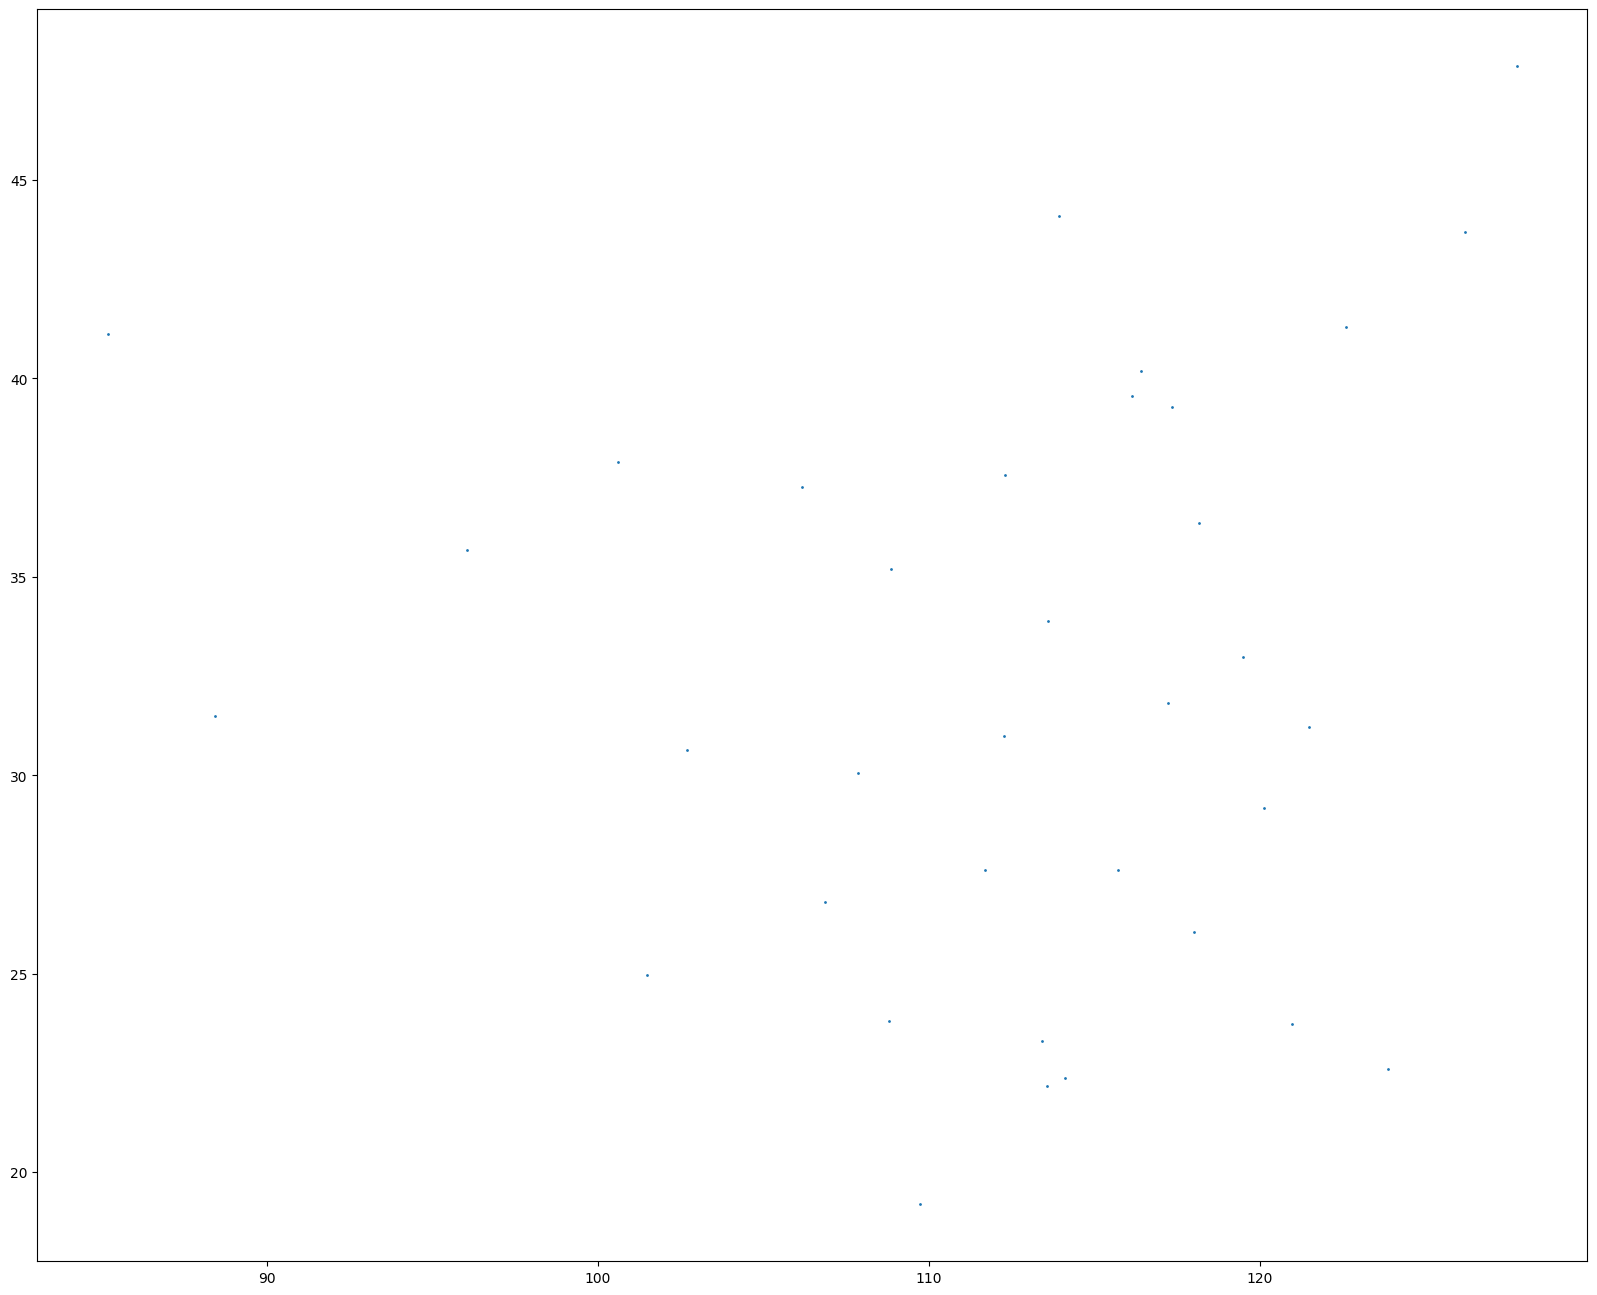

In [27]:
grid_point.plot(markersize=1, figsize=(20,20))

In [2]:
# 从网络URL读取GeoJSON数据
url = 'https://geojson.cn/api/data/china.json' 
gdf = gpd.read_file(url)

def make_grid(boundary, radius):
    # 以边界的中心点按照radius半径进行外扩
    minx, miny, maxx, maxy = boundary.total_bounds
    deltax = ((maxx-minx) % (radius*2)) / 2
    deltay = ((maxy-miny) % (radius*2)) / 2
    minx -= deltax
    maxx += deltax
    miny -= deltay
    maxy += deltay
    cells = []
    for x in np.arange(minx, maxx, radius*2):
        for y in np.arange(miny, maxy, radius*2):
            cells.append(Polygon([(x, y), (x, y+radius*2), (x+radius*2, y+radius*2), (x+radius*2, y), (x, y)]))
    return gpd.GeoDataFrame(cells, columns=['geometry'], crs=boundary.crs).sjoin(boundary, how='inner')

# 创建网格
grid = make_grid(gdf, 0.25)

# 确保所有几何对象是多边形类型
grid['geometry'] = grid['geometry'].apply(lambda poly: Polygon(poly.exterior.coords))

# 绘制边界
grid.boundary.plot(lw=0.2, figsize=(20, 20))

# 保存为 Shapefile
output_path = 'data/矢量/grid.shp'
grid.to_file(output_path)  # 确保在处理后的 grid 上调用 to_file

# 重置索引并添加 'FID' 列
grid.reset_index(inplace=True)
grid = grid[['geometry', 'name']].copy()
grid['FID'] = grid.index

# 打印前几行来检查 'FID' 列
print(grid.head())

# 使用 .info() 方法查看所有列的详细信息
grid.info()

# 创建 grid_point
grid_point = gpd.GeoDataFrame(grid[['FID']], geometry=grid.centroid, crs=grid.crs)
grid_point.plot(markersize=1, figsize=(20,20))
print(grid_point)

NameError: name 'gpd' is not defined

C:\Users\13532\AppData\Local\Temp\ipykernel_45588\486892304.py:31: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  grid.to_file(output_path)  # 确保在处理后的 grid 上调用 to_file


                                            geometry name  FID
0  POLYGON ((73.45570 38.44871, 73.45570 38.94871...   新疆    0
1  POLYGON ((73.45570 38.94871, 73.45570 39.44871...   新疆    1
2  POLYGON ((73.45570 39.44871, 73.45570 39.94871...   新疆    2
3  POLYGON ((73.45570 39.94871, 73.45570 40.44871...   新疆    3
4  POLYGON ((73.95570 38.44871, 73.95570 38.94871...   新疆    4
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5210 entries, 0 to 5209
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  5210 non-null   geometry
 1   name      5210 non-null   object  
 2   FID       5210 non-null   int64   
dtypes: geometry(1), int64(1), object(1)
memory usage: 122.2+ KB


C:\Users\13532\AppData\Local\Temp\ipykernel_45588\486892304.py:45: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid_point = gpd.GeoDataFrame(grid[['FID']], geometry=grid.centroid, crs=grid.crs)


       FID                    geometry
0        0   POINT (73.70570 38.69871)
1        1   POINT (73.70570 39.19871)
2        2   POINT (73.70570 39.69871)
3        3   POINT (73.70570 40.19871)
4        4   POINT (74.20570 38.69871)
...    ...                         ...
5205  5205  POINT (125.70570 22.19871)
5206  5206  POINT (126.20570 22.19871)
5207  5207  POINT (126.20570 22.69871)
5208  5208  POINT (126.70570 22.69871)
5209  5209  POINT (126.70570 23.19871)

[5210 rows x 2 columns]


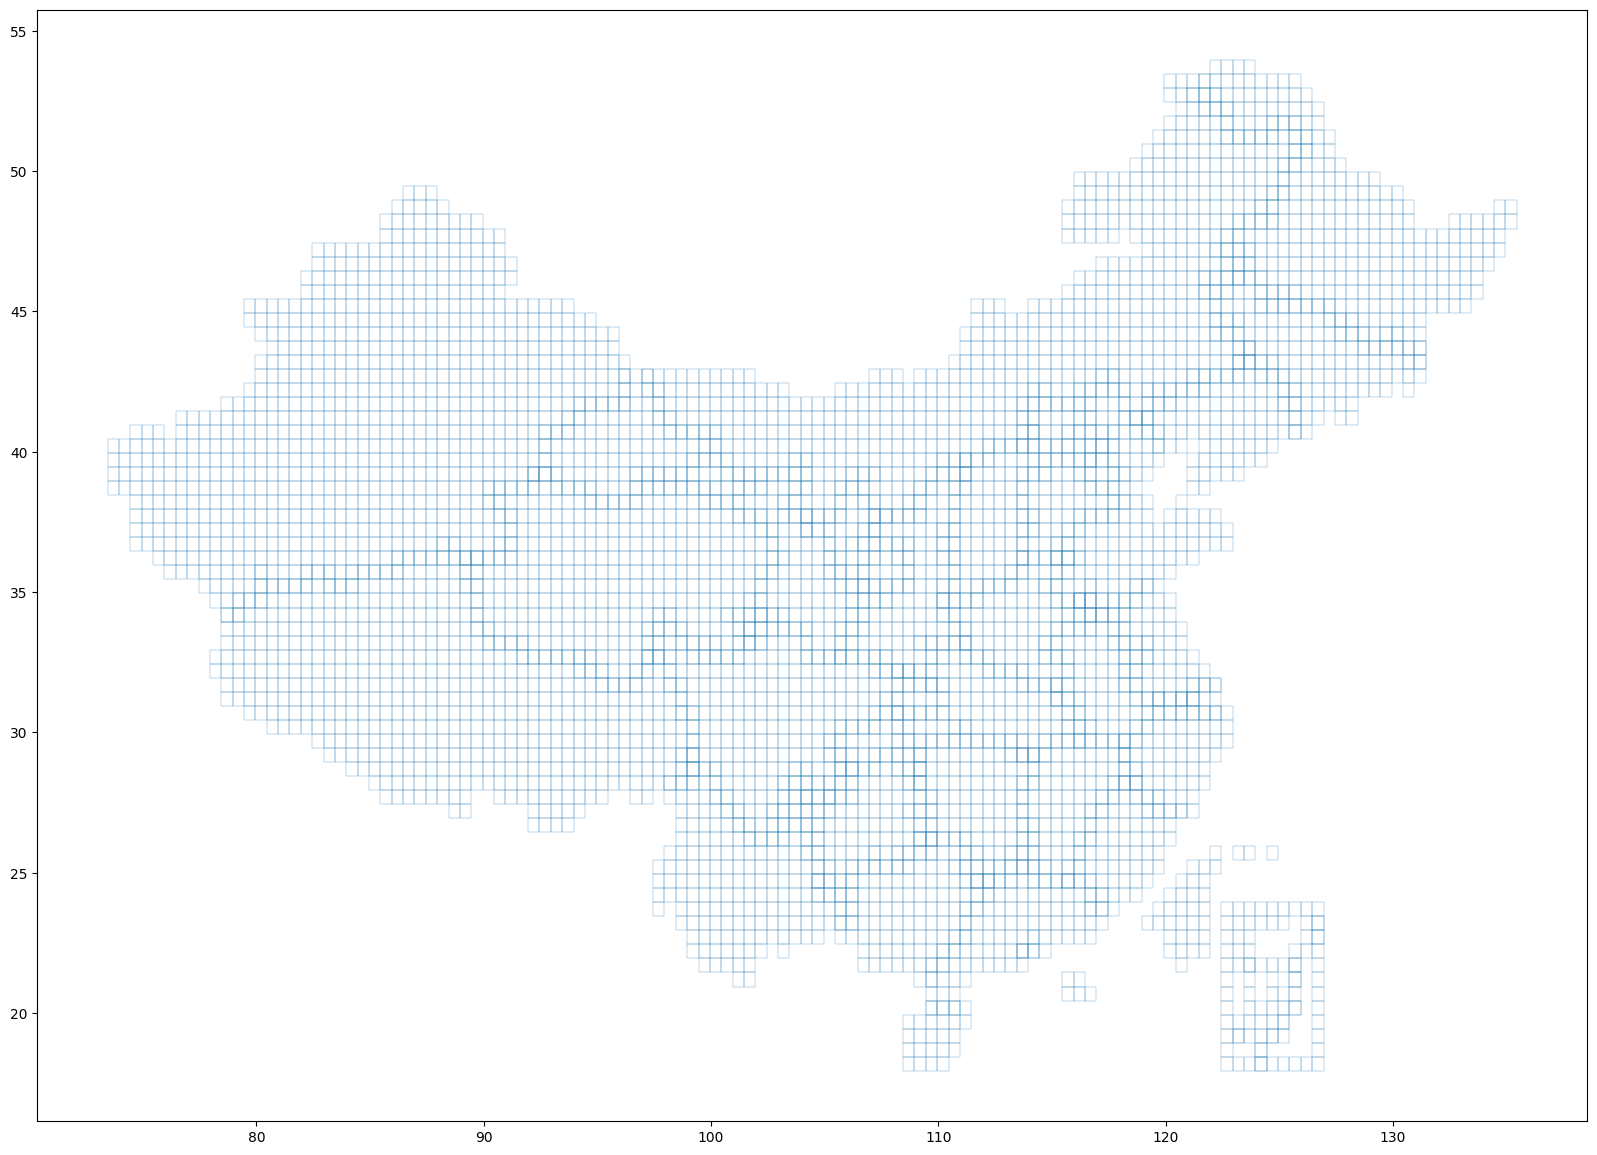

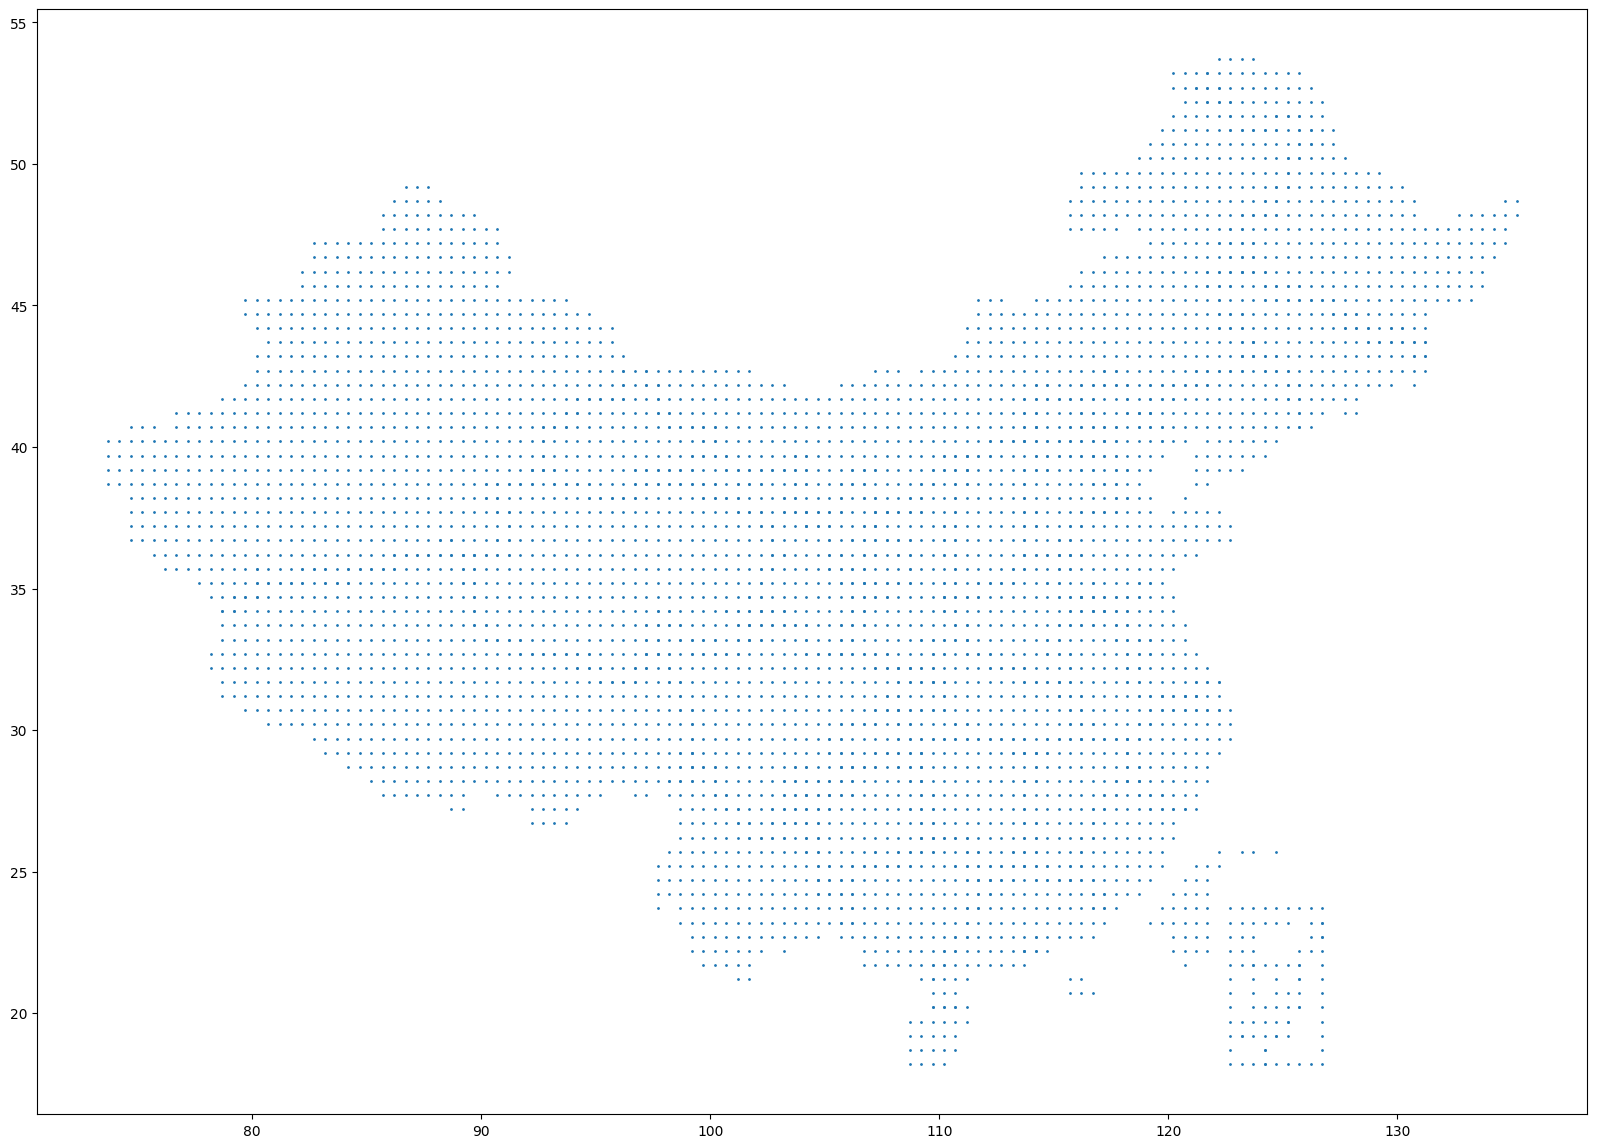

In [28]:
# 从网络URL读取GeoJSON数据
path = 'C:/Users/13532/pycode/huawei/data/矢量/china.json'
gdf = gpd.read_file(path)

def make_grid(boundary, radius):
    # 以边界的中心点按照radius半径进行外扩
    minx, miny, maxx, maxy = boundary.total_bounds
    deltax = ((maxx-minx) % (radius*2)) / 2
    deltay = ((maxy-miny) % (radius*2)) / 2
    minx -= deltax
    maxx += deltax
    miny -= deltay
    maxy += deltay
    cells = []
    for x in np.arange(minx, maxx, radius*2):
        for y in np.arange(miny, maxy, radius*2):
            cells.append(Polygon([(x, y), (x, y+radius*2), (x+radius*2, y+radius*2), (x+radius*2, y), (x, y)]))
    return gpd.GeoDataFrame(cells, columns=['geometry'], crs=boundary.crs).sjoin(boundary, how='inner')

# 创建网格
grid = make_grid(gdf, 0.25)

# 确保所有几何对象是多边形类型
grid['geometry'] = grid['geometry'].apply(lambda poly: Polygon(poly.exterior.coords))

# 绘制边界
grid.boundary.plot(lw=0.2, figsize=(20, 20))

# 保存为 Shapefile
output_path = 'data/矢量/grid.shp'
grid.to_file(output_path)  # 确保在处理后的 grid 上调用 to_file

# 重置索引并添加 'FID' 列
grid.reset_index(inplace=True)
grid = grid[['geometry', 'name']].copy()
grid['FID'] = grid.index

# 打印前几行来检查 'FID' 列
print(grid.head())

# 使用 .info() 方法查看所有列的详细信息
grid.info()

# 创建 grid_point
grid_point = gpd.GeoDataFrame(grid[['FID']], geometry=grid.centroid, crs=grid.crs)
grid_point.plot(markersize=1, figsize=(20,20))
print(grid_point)

## 提取至点

In [29]:
def get_values(tif_path, name):
    ds = gdal.Open(tif_path)
    if ds is None:
        print('Could not open file')
        return pd.DataFrame()

    # 获取栅格的基本信息
    cols = ds.RasterXSize
    rows = ds.RasterYSize
    
    # 读取整个波段的数据到 numpy 数组中
    band = ds.GetRasterBand(1)
    values = band.ReadAsArray()

    # 将 numpy 数组转换为一维，并创建 DataFrame
    flattened_values = values.flatten()
    
    return pd.DataFrame(data={name: flattened_values})

def get_coordinate(tif_path):
    ds = gdal.Open(tif_path)
    if ds is None:
        print('Could not open file')
        return pd.DataFrame()

    # 获取栅格的基本信息
    cols = ds.RasterXSize
    rows = ds.RasterYSize
    gt = ds.GetGeoTransform()

    # 计算行列号对应的偏移量
    col_indices = np.arange(cols) + 0.5
    row_indices = np.arange(rows) + 0.5

    # 构建网格
    col_grid, row_grid = np.meshgrid(col_indices, row_indices)

    # 计算坐标
    lons = gt[0] + col_grid * gt[1] + row_grid * gt[2]
    lats = gt[3] + col_grid * gt[4] + row_grid * gt[5]

    # 将坐标转换为一维数组
    lon_flattened = lons.flatten()
    lat_flattened = lats.flatten()

    return pd.DataFrame(data={'lon': lon_flattened, 'lat': lat_flattened})

In [30]:
# 所以数据合并起来
# 按年份生成表格
years = [str(year) for year in range(1990,2021)]

### 土地利用数据

In [31]:
import ipywidgets

In [32]:
path = 'D:/研究生学习资料/比赛/华为杯/D数据集/数据集4/中国大陆0.5°土地利用和覆盖变化数据集(1900-2019年)/数据实体/'
landuse = [tif for tif in os.listdir(path) if tif.endswith('tif')]

In [33]:
df_landuse = get_coordinate(path+landuse[0])

D:\Anaconda\envs\huawei_math\lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [34]:
# 提取数据
for i in trange(len(landuse)):
    file_name = landuse[i]
    name = file_name.split('.')[0]
    df = get_values(path + file_name, name)
    df_landuse = pd.concat([df_landuse, df], axis=1)

  0%|          | 0/600 [00:00<?, ?it/s]

In [35]:
# gdf1 = gpd.GeoDataFrame(df_landuse[['lon','lat']], geometry=gpd.points_from_xy(df_landuse.lon,df_landuse.lat), crs=gdf.crs)
# gdf1.sjoin(grid)[['lon','lat','FID']].to_csv('data/Q3/landuse_to_index.csv', index=False)

In [36]:
# 计算不透水面
columns = list(set([field.split('-')[1] for field in df_landuse.drop(columns=['lon','lat']).columns]))
for year in columns:
    df_landuse[f'buildup-{year}'] = df_landuse[[field for field in df_landuse.columns if year in field]].sum(axis=1)

In [37]:
grid_point['lon'] = grid_point.centroid.x
grid_point['lat'] = grid_point.centroid.y

C:\Users\13532\AppData\Local\Temp\ipykernel_45588\1865075117.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid_point['lon'] = grid_point.centroid.x
C:\Users\13532\AppData\Local\Temp\ipykernel_45588\1865075117.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid_point['lat'] = grid_point.centroid.y


In [38]:
# 空间连接
gdf1 = gpd.GeoDataFrame(df_landuse[['lon','lat']], geometry=gpd.points_from_xy(df_landuse.lon,df_landuse.lat), crs=gdf.crs)
gdf2 = gdf1.sjoin(grid)

In [39]:
df_landuse1 = df_landuse.merge(gdf2[['lon','lat','FID']], on=['lon','lat'], how='left').dropna()
df_landuse1

,lon,lat,cropland-1900,cropland-1901,cropland-1902,cropland-1903,cropland-1904,cropland-1905,cropland-1906,cropland-1907,...,buildup-1922,buildup-2001,buildup-2005,buildup-1934,buildup-1949,buildup-1905,buildup-2010,buildup-1997,buildup-1915,FID
480,121.975,53.825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4715.0
481,122.475,53.825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4724.0
482,122.975,53.825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4735.0
483,123.475,53.825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4746.0
603,119.975,53.325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10433,124.475,18.325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5154.0
10434,124.975,18.325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5163.0
10435,125.475,18.325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5170.0
10436,125.975,18.325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5175.0


In [40]:
landuse_grid = df_landuse1.groupby('FID').mean().reset_index()

In [44]:
# 按照年份保存
for year in years:
    columns = [column for column in list(landuse_grid.columns) if year in column] + ['FID']
    landuse_grid[columns].merge(grid_point.drop(columns='geometry'), on='FID', how='left').to_csv(f'C:/Users/13532/pycode/huawei/data/CSV/土地利用/landuse_{year}.csv', index=False)

### 降水

In [48]:
path = 'D:/研究生学习资料/比赛/华为杯/Test/0.25 Degree Rain(1990-2020)/'
rain = [tif for tif in os.listdir(path) if tif.endswith('tif')]

In [49]:
df_rain = get_coordinate(path+rain[0])

In [50]:
# 提取数据
for i in trange(len(rain)):
    file_name = rain[i]
    name = file_name.split('.')[0]
    df = get_values(path + file_name, name)
    df_rain = pd.concat([df_rain, df], axis=1)

  0%|          | 0/11322 [00:00<?, ?it/s]

In [51]:
gdf1 = gpd.GeoDataFrame(df_rain[['lon','lat']], geometry=gpd.points_from_xy(df_rain.lon,df_rain.lat), crs=gdf.crs)
gdf2 = gdf1.sjoin(grid)

In [52]:
# sum_ = []
# for year in years:
#     sum_.append(df_rain1[[field for field in list(df_rain1.columns) if year in field]].mean().sum())
# pd.DataFrame(data={'mean':sum_,'year':years}).to_csv('mean.csv', index=False)

In [53]:
df_rain1 = df_rain.merge(gdf2[['lon','lat','FID']], on=['lon','lat'], how='left').dropna()
df_rain1

,lon,lat,TIF1990-01-01,TIF1990-01-02,TIF1990-01-03,TIF1990-01-04,TIF1990-01-05,TIF1990-01-06,TIF1990-01-07,TIF1990-01-08,...,TIF2020-12-22,TIF2020-12-23,TIF2020-12-24,TIF2020-12-25,TIF2020-12-26,TIF2020-12-27,TIF2020-12-28,TIF2020-12-29,TIF2020-12-30,FID
145,108.50,18.25,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,...,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,3528.0
146,108.75,18.25,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,...,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,3528.0
147,109.00,18.25,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,...,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,-99.900002,3532.0
148,109.25,18.25,0.100000,1.720000,0.450000,0.760000,0.230000,0.420000,0.180000,0.000000,...,0.000000,0.220000,0.060000,0.000000,0.000000,0.090000,0.000000,0.000000,0.020000,3532.0
149,109.50,18.25,0.050000,1.040000,0.310000,0.600000,0.130000,0.200000,0.090000,0.000000,...,0.000000,0.130000,0.030000,0.000000,0.000000,0.070000,0.000000,0.000000,0.010000,3536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40276,122.75,53.75,0.000000,0.000000,0.000000,0.720000,0.220000,0.000000,0.000000,0.400000,...,0.030000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4724.0
40277,123.00,53.75,0.000000,0.000000,0.000000,0.690000,0.260000,0.000000,0.000000,0.410000,...,0.060000,0.040000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,4735.0
40278,123.25,53.75,0.000000,0.000000,0.000000,0.650000,0.310000,0.000000,0.000000,0.420000,...,0.090000,0.080000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,4735.0
40279,123.50,53.75,0.000000,0.000000,0.000000,0.600000,0.360000,0.000000,0.000000,0.410000,...,0.110000,0.120000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,4746.0


In [54]:
# 过滤研究区外的异常值
df_rain1 = df_rain1[~(df_rain1 < 0).any(axis=1)]
df_rain1

,lon,lat,TIF1990-01-01,TIF1990-01-02,TIF1990-01-03,TIF1990-01-04,TIF1990-01-05,TIF1990-01-06,TIF1990-01-07,TIF1990-01-08,...,TIF2020-12-22,TIF2020-12-23,TIF2020-12-24,TIF2020-12-25,TIF2020-12-26,TIF2020-12-27,TIF2020-12-28,TIF2020-12-29,TIF2020-12-30,FID
148,109.25,18.25,0.10,1.72,0.45,0.76,0.23,0.42,0.18,0.00,...,0.00,0.22,0.06,0.00,0.0,0.09,0.0,0.0,0.02,3532.0
149,109.50,18.25,0.05,1.04,0.31,0.60,0.13,0.20,0.09,0.00,...,0.00,0.13,0.03,0.00,0.0,0.07,0.0,0.0,0.01,3536.0
150,109.75,18.25,0.01,0.45,0.17,0.42,0.05,0.06,0.03,0.00,...,0.00,0.05,0.01,0.00,0.0,0.04,0.0,0.0,0.00,3536.0
405,109.00,18.50,0.15,2.27,0.44,0.78,0.28,0.68,0.26,0.00,...,0.00,0.23,0.06,0.00,0.0,0.08,0.0,0.0,0.02,3533.0
406,109.25,18.50,0.11,2.61,0.42,0.86,0.78,0.65,0.21,0.00,...,0.00,0.19,0.06,0.00,0.0,0.07,0.0,0.0,0.02,3533.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40276,122.75,53.75,0.00,0.00,0.00,0.72,0.22,0.00,0.00,0.40,...,0.03,0.01,0.00,0.00,0.0,0.00,0.0,0.0,0.00,4724.0
40277,123.00,53.75,0.00,0.00,0.00,0.69,0.26,0.00,0.00,0.41,...,0.06,0.04,0.00,0.01,0.0,0.00,0.0,0.0,0.00,4735.0
40278,123.25,53.75,0.00,0.00,0.00,0.65,0.31,0.00,0.00,0.42,...,0.09,0.08,0.00,0.02,0.0,0.00,0.0,0.0,0.00,4735.0
40279,123.50,53.75,0.00,0.00,0.00,0.60,0.36,0.00,0.00,0.41,...,0.11,0.12,0.00,0.03,0.0,0.00,0.0,0.0,0.00,4746.0


In [55]:
rain_grid = df_rain1.groupby('FID').mean().reset_index()

In [57]:
# 按照年份保存
for year in years:
    columns = [column for column in list(rain_grid.columns) if year in column] + ['FID']
    rain_grid[columns].merge(grid_point.drop(columns='geometry'), on='FID', how='left').to_csv(f'C:/Users/13532/pycode/huawei/data/CSV/降雨/rain_{year}.csv', index=False)

### 温度

- 温度数据是两层文件夹

In [67]:
path = 'D:/研究生学习资料/比赛/华为杯/D数据集/数据集2/日平均数据/1990-2018-气温/'
dir_next = [file for file in os.listdir(path) if file.split('_')[0] in years]

In [68]:
temperature = []
for file in dir_next:
    temperature += [path + file + '/' + tif for tif in os.listdir(path + file) if tif.endswith('.tif')]

In [70]:
df_temperature = get_coordinate(temperature[0])
gdf1 = gpd.GeoDataFrame(df_temperature[['lon','lat']], geometry=gpd.points_from_xy(df_temperature.lon,df_temperature.lat), crs=gdf.crs)
gdf2 = gdf1.sjoin(grid)
gdf2

,lon,lat,geometry,index_right,name,FID
8220,122.050004,53.850763,POINT (122.05000 53.85076),4715,黑龙江,4715
8221,122.150004,53.850763,POINT (122.15000 53.85076),4715,黑龙江,4715
8222,122.250004,53.850763,POINT (122.25000 53.85076),4715,黑龙江,4715
8223,122.350004,53.850763,POINT (122.35000 53.85076),4715,黑龙江,4715
8224,122.450004,53.850763,POINT (122.45000 53.85076),4715,黑龙江,4715
...,...,...,...,...,...,...
259565,126.550004,17.950763,POINT (126.55000 17.95076),5178,南海诸岛,5178
259566,126.650004,17.950763,POINT (126.65000 17.95076),5178,南海诸岛,5178
259567,126.750004,17.950763,POINT (126.75000 17.95076),5178,南海诸岛,5178
259568,126.850004,17.950763,POINT (126.85000 17.95076),5178,南海诸岛,5178


In [72]:
for i in trange(len(temperature)):
    file = temperature[i]
    name = file.split('/')[-1][:8]
    df = get_values(file, name)
    df.to_csv(f'C:/Users/13532/pycode/huawei/data/CSV/中间数据集/{name}.csv', index=False)
    # df_temperature = pd.concat([df_temperature, df], axis=1)

  0%|          | 0/10592 [00:00<?, ?it/s]

In [73]:
path = 'C:/Users/13532/pycode/huawei/data/CSV/中间数据集/'
csvs = os.listdir(path)
for i in trange(len(years)):
    df_all = pd.DataFrame()
    year = years[i]
    csv_ = [csv for csv in csvs if csv.startswith(year)]
    if csv_:
        for csv in csv_:
            df = pd.read_csv(path + csv)
            df_all = pd.concat([df_all, df], axis=1)
    df_all = pd.concat([df_all, df_temperature], axis=1)
    df_all.merge(gdf2[['lon','lat','FID']], on=['lon','lat'], how='left').dropna().to_csv(f'C:/Users/13532/pycode/huawei/data/CSV/温度/temperature_{year}.csv', index=False)

  0%|          | 0/31 [00:00<?, ?it/s]

### GDP

In [99]:
# 坐标转换
def reproject_to_wgs84(input_tif, output_tif):
    dataset = gdal.Open(input_tif)
    if dataset is None:
        raise FileNotFoundError(f"无法打开文件: {input_tif}")
    
    proj = dataset.GetProjection()  # 获取输入图像的投影信息
    
    # 创建目标坐标系
    target_srs = osr.SpatialReference()
    target_srs.ImportFromEPSG(4326)  # EPSG:4326为WGS84
    
    # 始坐标系
    source_srs = osr.SpatialReference()
    source_srs.ImportFromWkt(proj)
    
    # 创建坐标转换对象
    coord_transform = osr.CoordinateTransformation(source_srs, target_srs)
    gdal.Warp(output_tif, dataset, dstSRS='EPSG:4326')

def select_df(df, lon_col, lat_col, gdf):
    polygon = gdf.unary_union  # 获取整个gdf的多边形范围
    points = [Point(lon, lat) for lon, lat in zip(df[lon_col], df[lat_col])]  # 将lon和lat转换为点的列表
    mask = [polygon.contains(point) for point in points]  # 使用向量化的contains方法来检查点是否位于shp多边形内
    df_in_shape = df[mask]   # 筛选出位于gdf边界内的点

    return df_in_shape

# 提取坐标和值
def get_values_(input_tif, name):
    ds = gdal.Open(input_tif)
    if ds is None:
        print('Could not open file')
        return pd.DataFrame()
    
    # 读取整个波段的数据到numpy数组中
    band = ds.GetRasterBand(1)
    values = band.ReadAsArray()

    flattened_values = values.flatten()  # 将numpy数组转换为一维，并创建DataFrame

    # 获取栅格的基本信息
    cols = ds.RasterXSize
    rows = ds.RasterYSize
    gt = ds.GetGeoTransform()

    # 计算行列号对应的偏移量
    col_indices = np.arange(cols) + 0.5
    row_indices = np.arange(rows) + 0.5

    col_grid, row_grid = np.meshgrid(col_indices, row_indices)  # 构建网格

    # 计算坐标
    lons = gt[0] + col_grid * gt[1] + row_grid * gt[2]
    lats = gt[3] + col_grid * gt[4] + row_grid * gt[5]

    # 将坐标转换为一维数组
    lon_flattened = lons.flatten()
    lat_flattened = lats.flatten()

    return pd.DataFrame(data={'lon':lon_flattened,'lat':lat_flattened,name:flattened_values})

def clip_tif(input_tif, shapefile, output_tif, nodata_value=-999):
    src_ds = gdal.Open(input_tif)
    # 使用gdal.Warp进行裁剪并设置NoData
    gdal.Warp(
        output_tif,           # 输出文件
        src_ds,               # 输入栅格数据集
        format="GTiff",       # 输出格式
        cutlineDSName=shapefile,  # 矢量文件路径
        cropToCutline=True,   # 仅裁剪到矢量边界
        dstNodata=nodata_value,  # 设置掩膜区域外的NoData值
        warpOptions=["CUTLINE_ALL_TOUCHED=TRUE"]  # 确保裁剪时考虑所有被触及的像素
    )

#shp_file文件里的列'pr_adcode', 'pr_name', 'cn_adcode', 'cn_name', 'geometry'

In [83]:
path = 'D:/研究生学习资料/比赛/华为杯/D数据集/数据集6/GDP_output/'
new_proj_path = 'C:/Users/13532/pycode/huawei/data/CSV/中间数据集/'
shp_file = 'C:/Users/13532/pycode/huawei/data/矢量/grid.shp'

gdp = [tif for tif in os.listdir(path) if tif.endswith('tif')]

In [81]:
shp_file = 'C:/Users/13532/pycode/huawei/data/矢量/province.shp'

# 使用 geopandas 读取 Shapefile
gdf = gpd.read_file(shp_file)

# 打印列名
print(gdf.columns)

Index(['pr_adcode', 'pr_name', 'cn_adcode', 'cn_name', 'geometry'], dtype='object')


In [84]:
# 统一为 wgs84
for i in trange(len(gdp)):
    file_name = gdp[i]
    reproject_to_wgs84(path+file_name, new_proj_path+file_name)

  0%|          | 0/26 [00:00<?, ?it/s]

In [85]:
# 裁剪
for i in trange(len(gdp)):
    file_name = gdp[i]
    clip_tif(new_proj_path+file_name, shp_file, new_proj_path+'clip_'+file_name)

  0%|          | 0/26 [00:00<?, ?it/s]

In [86]:
# 直接求格网均值
gdp_ = [tif for tif in os.listdir(new_proj_path) if tif.startswith('clip')]
for i in trange(len(gdp_)):
    file_name = gdp_[i]
    name = file_name.split('.')[0].split('_')[1]
    df = get_values_(new_proj_path + file_name, name)
    df_gdp = gpd.GeoDataFrame(df[['lon','lat',name]], geometry=gpd.points_from_xy(df.lon,df.lat), crs=gdf.crs).sjoin(grid[['geometry','FID']]).drop(columns=['geometry','index_right','lon','lat'])  # 确定研究区内的数据
    df_gdp = df_gdp[df_gdp[name]>=0].copy()  # 过滤NoData
    df_gdp.groupby('FID').mean().reset_index().to_csv(f'C:/Users/13532/pycode/huawei/data/CSV/GDP/{name}.csv', index=False)  # 求均值然后保存

  0%|          | 0/26 [00:00<?, ?it/s]

### DEM相关

In [95]:
path = 'D:/研究生学习资料/比赛/华为杯/D数据集/数据集1/中国数字高程图(1km)/Albers_105/TIFF/'
new_proj_path = 'C:/Users/13532/pycode/huawei/data/CSV/中间数据集/'
shp_file = 'C:/Users/13532/pycode/huawei/data/矢量/grid.shp'

dem = [tif for tif in os.listdir(path) if tif.endswith('tif')]

In [96]:
# 统一为 wgs84
for i in trange(len(dem)):
    file_name = dem[i]
    reproject_to_wgs84(path+file_name, new_proj_path+file_name)

  0%|          | 0/4 [00:00<?, ?it/s]

In [97]:
# 裁剪
for i in trange(len(dem)):
    file_name = dem[i]
    clip_tif(new_proj_path+file_name, shp_file, new_proj_path+'clip_'+file_name)

  0%|          | 0/4 [00:00<?, ?it/s]

In [102]:
# 提取
dem_ = [tif for tif in os.listdir(new_proj_path) if tif.startswith('clip')]
for i in trange(len(dem_)):
    file_name = dem_[i]
    name = file_name.split('.')[0][5:]
    df = get_values_(new_proj_path+file_name, name)
    # 检查DataFrame是否包含必要的列
    if 'lon' not in df.columns or 'lat' not in df.columns:
        print(f"Skipping file {file_name}, missing 'lon' or 'lat' columns.")
        continue
        df_dem = gpd.GeoDataFrame(df[['lon','lat',name]], geometry=gpd.points_from_xy(df.lon,df.lat), crs=gdf.crs).sjoin(grid[['geometry','FID']]).drop(columns=['geometry','index_right','lon','lat']) 
        df_dem = df_dem[df_dem[name]>=0].copy()
        df_dem.groupby('FID').mean().reset_index().to_csv(f'C:/Users/13532/pycode/huawei/data/CSV/DEM/{name}.csv', index=False)  # 求均值然后保存

  0%|          | 0/5 [00:00<?, ?it/s]

Could not open file
Skipping file clip_chdem_105.tif.aux.xml, missing 'lon' or 'lat' columns.


### 人口

In [103]:
path = 'D:/研究生学习资料/比赛/华为杯/D数据集/数据集5/pop_output/'
new_proj_path = 'C:/Users/13532/pycode/huawei/data/CSV/中间数据集/'
shp_file = 'C:/Users/13532/pycode/huawei/data/矢量/grid.shp'

dir_next = os.listdir(path)

In [104]:
# 坐标统一wgs84
for i in trange(len(dir_next)):
    file_name = [tif for tif in os.listdir(path+dir_next[i]) if tif.endswith('tif')][0]
    reproject_to_wgs84(path+dir_next[i]+'/'+file_name, new_proj_path+file_name)

  0%|          | 0/26 [00:00<?, ?it/s]

In [105]:
# 裁剪
pop = [tif for tif in os.listdir(new_proj_path) if tif.endswith('.tif')]
for i in trange(len(pop)):
    file_name = pop[i]
    clip_tif(new_proj_path+file_name, shp_file, new_proj_path+'clip_'+file_name)

  0%|          | 0/26 [00:00<?, ?it/s]

In [106]:
# 提取
pop_ = [tif for tif in os.listdir(new_proj_path) if tif.startswith('clip')]
for i in trange(len(pop_)):
    file_name = pop_[i]
    name = file_name.split('.')[0][5:]
    df = get_values_(new_proj_path+file_name, name)
    df_dem = gpd.GeoDataFrame(df[['lon','lat',name]], geometry=gpd.points_from_xy(df.lon,df.lat), crs=gdf.crs).sjoin(grid[['geometry','FID']]).drop(columns=['geometry','index_right','lon','lat']) 
    df_dem = df_dem[df_dem[name]>=0].copy()
    df_dem.groupby('FID').mean().reset_index().to_csv(f'C:/Users/13532/pycode/huawei/data/CSV/人口/{name}.csv', index=False)  # 求均值然后保存

  0%|          | 0/26 [00:00<?, ?it/s]